# Python Data Visualization

![Data Visualization](https://images.unsplash.com/photo-1427751840561-9852520f8ce8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1176&q=80)


photo by [Adeolu Eletu](https://unsplash.com/@adeolueletu) at [Unsplash](https://unsplash.com/)


## Introduction

This is the companion colab code for my tutorial in medium about Python Data Visualization, please read the article for better understanding of the code.  
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)

article not yet published

In [ ]:
!pip install waterfallcharts
!pip install pywaffle

  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=81cd749a62a45a1d125c5865090039a6da6a12193d97dd8512265fb7d337b739
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts
     |████████████████████████████████| 565 kB 3.2 MB/s 


In [ ]:
!pip install basemap

     |████████████████████████████████| 862 kB 2.7 MB/s 
     |████████████████████████████████| 219 kB 54.0 MB/s 
     |████████████████████████████████| 30.5 MB 1.7 MB/s 
     |████████████████████████████████| 6.3 MB 31.1 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=72e09d12f488736bdb41a67fbd4d74a7b36f3aed3f17f869a825fef26092755e
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
#import the needed library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import waterfall_chart
import pywaffle
import warnings
from wordcloud import WordCloud
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings("ignore")

In [ ]:
#load iris dataset
df = pd.read_csv("https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/iris_flowers.csv")
df.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


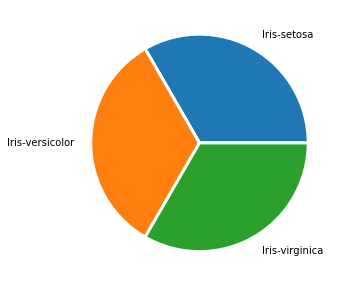

In [ ]:
#pie chart
plt.rcParams["figure.figsize"] = (20,5)
#generate count of your variable
values=df.Species.value_counts().tolist()
names = df.Species.value_counts().index.tolist()
#create a pie-chart
plt.pie(values, labels=names, labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

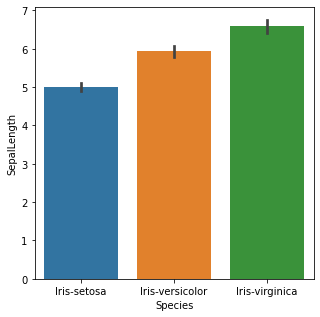

In [ ]:
#make a barplot
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.barplot(x="Species", y="SepalLength", data=df)

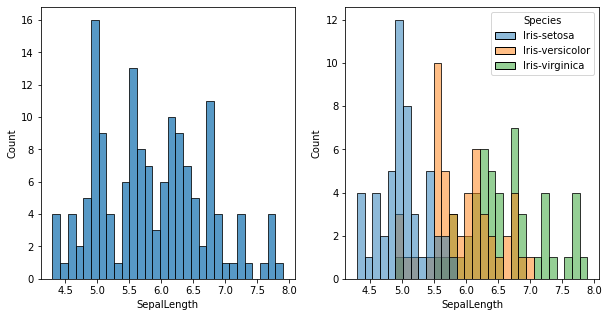

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(hspace = .5, wspace=0.2)
#histogram of one feature
sns.histplot(data=df, x="SepalLength", bins=30, ax = axes[0])
#use hue to show the different species
sns.histplot(data=df, x="SepalLength", bins=30, hue = "Species", ax = axes[1])

<BarContainer object of 4 artists>

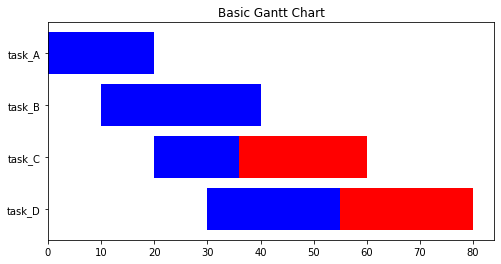

In [ ]:
#basic Gantt chart
plt.figure(figsize=(8,4))
gan = pd.DataFrame()
gan["Task"] = ["task_A", "task_B", "task_C", "task_D"]
gan["start"] = [0, 10, 20, 30]
gan["end"] = [20,30,40,50]
gan["Completion"] = [100,100,40,50]
gan['percentage_comp']=round(gan.Completion*gan.end/100,2)
gan=gan.sort_values(by='start', ascending=False)
plt.title('Basic Gantt Chart', size=12)
plt.barh(y=gan.Task, left=gan.start, width=gan.end, color = "red")
plt.barh(y=gan.Task, left=gan.start, width=gan.percentage_comp, color = "blue")

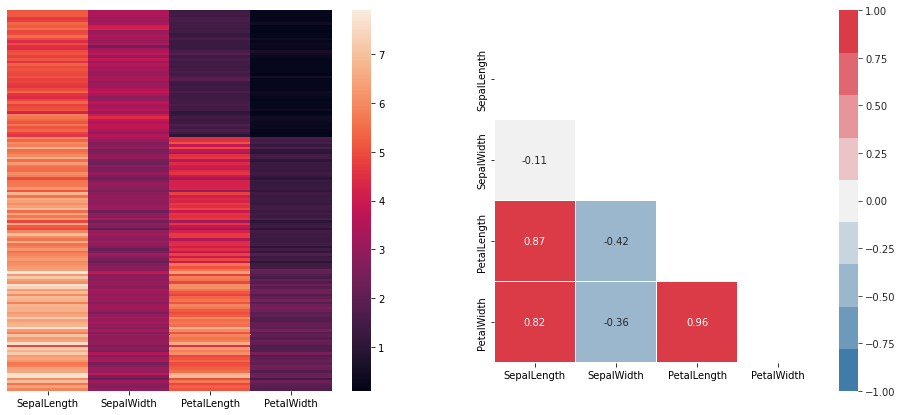

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.subplots_adjust(hspace = .5, wspace=0.2)

#Heatmap of the Iris dataset
#df1 = df.sample(frac=0.15, replace=False, random_state=1)
df1 = df.sort_values(by=['Species'])
sns.heatmap(df1.iloc[:,:4],  yticklabels=False,  ax = axes[0])

#correlation heatmap of iris dataset
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, linewidths=.5, cmap=sns.diverging_palette(240, 10, n=9), 
                     vmin = -1, vmax = 1, annot=True, fmt=".2f", square=True, ax = axes[1])

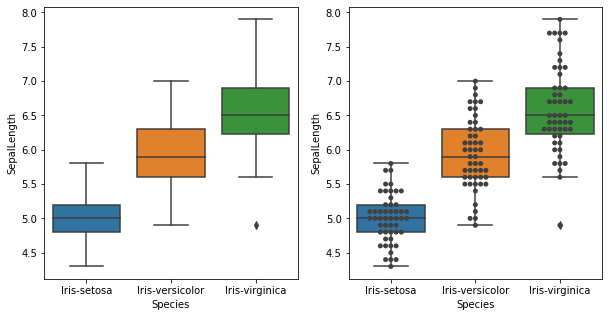

In [ ]:
#boxplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(hspace = .5, wspace=0.2)
ax = sns.boxplot(data=df, y="SepalLength", x = "Species", ax = axes[0])
ax = sns.boxplot(data=df, y="SepalLength", x= "Species", ax = axes[1])
#add swarm plot
ax = sns.swarmplot(data=df, y="SepalLength", x = "Species", ax = axes[1], color=".25")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

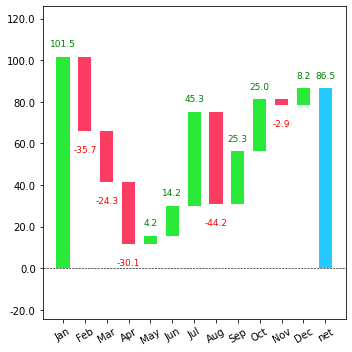

In [ ]:
#waterfall charts

wf = pd.DataFrame({'Price Euro':[101.5, 65.8, 41.5, 11.40,15.6, 29.8,
                              75.10, 30.90, 56.20, 81.15, 78.3, 86.50]}, 
                      index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                             'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                             'Nov', 'Dec'])
Variation = [wf['Price Euro'][i] if i==0 else wf['Price Euro'][i]-wf['Price Euro'][i-1] for i in range(len(wf))]
wf['Variation'] = Variation

waterfall_chart.plot(wf.index, wf['Variation'])

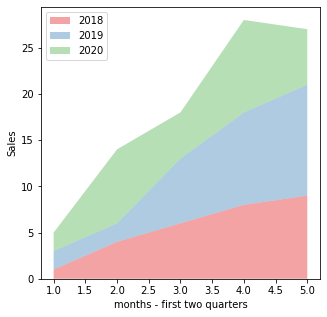

In [ ]:
# Data
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Plot the area chart
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=['2018','2019','2020'], 
              colors=pal, alpha=0.4 )
plt.legend(loc='upper left')
plt.xlabel("months - first two quarters")
plt.ylabel("Sales")
plt.show()

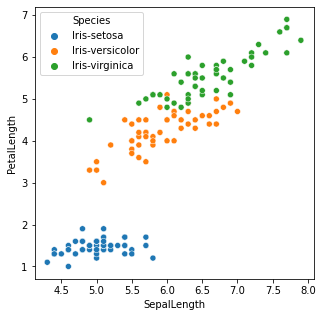

In [ ]:
#simple scatter plot
sns.scatterplot(data=df, x="SepalLength", y="PetalLength", hue="Species")

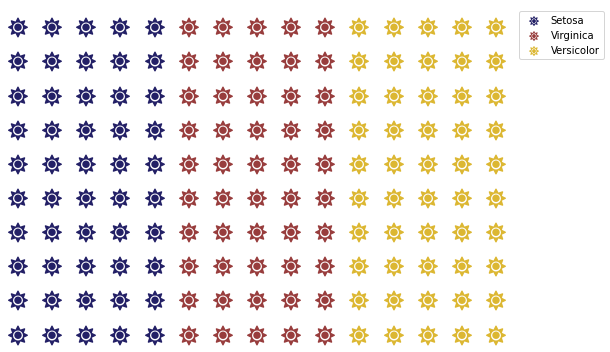

In [ ]:
#pictogram chart of the iris dataset
from pywaffle import Waffle
plt.figsize=(10, 10)
data = {'Setosa': 50, 'Virginica': 50, 'Versicolor': 50}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=["#232066", "#983D3D", "#DCB732"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='sun', 
    font_size=20, 
    icon_legend=True,
    figsize=(10, 5)
)
plt.show()

([<matplotlib.axis.XTick at 0x7f42c921d210>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

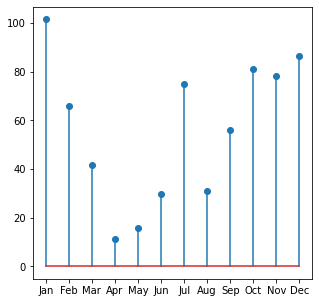

In [ ]:
#lollipop chart
my_range = my_range=range(0,len(wf.index))
plt.stem(wf['Price Euro'])
plt.xticks(my_range , wf.index)

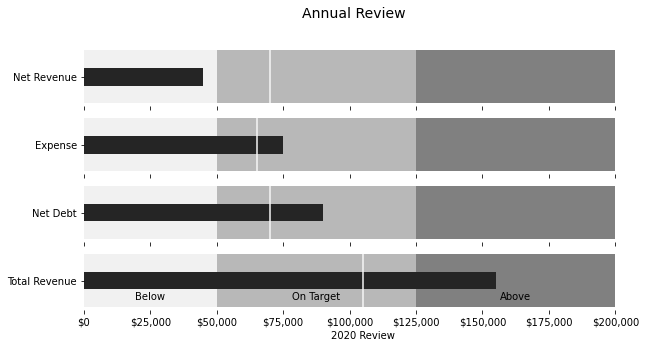

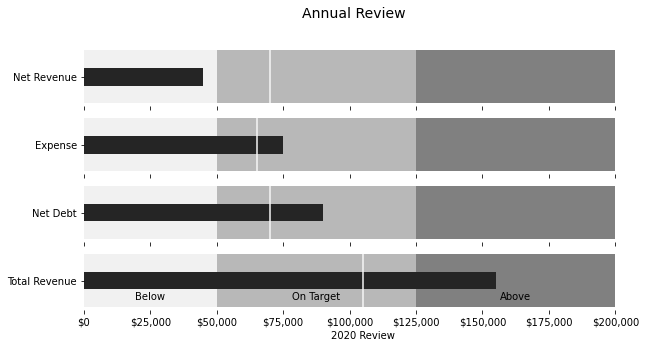

In [ ]:
#code from https://github.com/chris1610/pbpython/blob/master/code/bullet_graph.py
#code license: https://github.com/chris1610/pbpython/blob/master/LICENSE

from matplotlib.ticker import FuncFormatter

def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, target_color="gray", bar_color="black",
                label_color="gray", formatter=None):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
            formatter = matplotlib formatter object for x axis
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if axis_label:
        ax.set_xlabel(axis_label)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)
    return fig

def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)

money_fmt = FuncFormatter(money)
data_to_plot3 = [("Net Revenue", 45000, 70000),
                 ("Expense", 75000, 65000),
                 ("Net Debt", 90000, 70000),
                 ("Total Revenue", 155000, 105000)]
palette = sns.light_palette("grey", 3, reverse=False)
bulletgraph(data_to_plot3, limits=[50000, 125000, 200000],
            labels=["Below", "On Target", "Above"], size=(10,5),
            axis_label="2020 Review", label_color="black",
            bar_color="#252525", target_color='#f7f7f7', palette=palette,
            title="Annual Review",
            formatter=money_fmt)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/worldcities.csv")
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


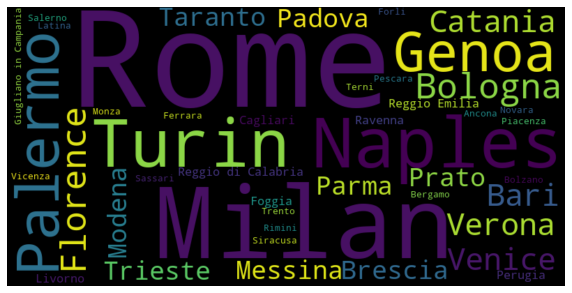

In [ ]:
#wordcloud
df1 = df[df["country"]=="Italy"]
df1 = df1[df1["population"]>= 100000] #filtering the population
df1 = df1[["city_ascii", "population"]]
df1["pop"] = np.round(df["population"]/100000, 0) #rounding for the size
data = dict(zip(df1['city_ascii'].tolist(), df1['pop'].tolist()))
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

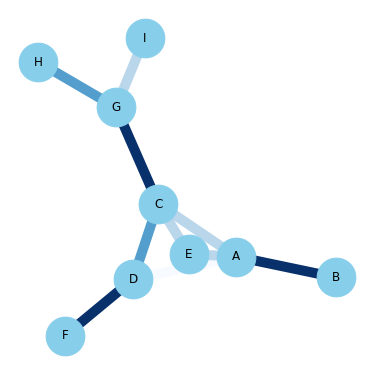

In [ ]:
import networkx as nx
 
# starting from a dataframe
df = pd.DataFrame({ 'from':['A', 'B', 'C','A','D','E','F','G', 'H','I' ],
                   'to':['D', 'A', 'E','C', 'C','A', 'D','C', 'G','G'], 
                   'value':[3, 10, 5, 5, 7, 10, 5, 10, 7,5] })
 
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )

nx.draw(G, with_labels=True, node_color='skyblue', 
        node_size=1500, edge_color=df['value'], 
        width=10.0, 
        edge_cmap=plt.cm.Blues)

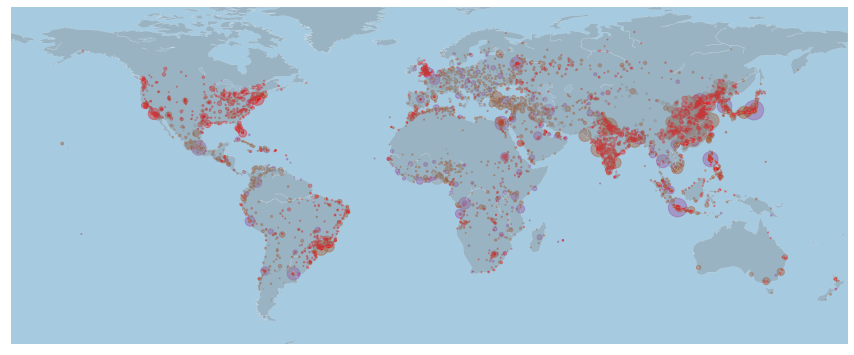

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/worldcities.csv")
plt.rcParams["figure.figsize"]=15,10

#prepare dataset
data = data[data["population"]>= 100000]

#background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# we use the capital column
data['labels_enc'] = pd.factorize(data['capital'])[0]
 
# Add a dot for each position
m.scatter(
    x=data['lng'], 
    y=data['lat'], 
    s=data['population']/100000, 
    alpha=0.4, 
    c=data['labels_enc'], 
    cmap="Set1"
)